<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-1-NLP/blob/master/COVID_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [0]:
pip install scispacy

In [0]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_md-0.2.4.tar.gz

In [0]:
df = pd.read_csv('all_sources_metadata_2020-03-13.csv')

In [0]:
df = df.drop(columns = ['sha', 'source_x', 'pmcid', 'license', 'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text'])

In [6]:
df.head()

,title,doi,pubmed_id,abstract,publish_time,authors,journal
0,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,32125455.0,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med
1,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery
2,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine
3,Characteristics of and Public Health Responses...,10.3390/jcm9020575,32093211.0,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med
4,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,32125453.0,NaN,2020,"Zhang, Wei",Intensive Care Med


In [0]:
df1 = df.dropna()

In [10]:
df1.head()

,title,doi,pubmed_id,abstract,publish_time,authors,journal
3,Characteristics of and Public Health Responses...,10.3390/jcm9020575,32093211.0,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med
12,Genome Detective Coronavirus Typing Tool for r...,10.1093/bioinformatics/btaa145,32108862.0,"SUMMARY: Genome Detective is a web-based, user...",2020,"Cleemput, S.; Dumon, W.; Fonseca, V.; Karim, W...","Bioinformatics (Oxford, England)"
30,Optimization Method for Forecasting Confirmed ...,10.3390/jcm9030674,32131537.0,"In December 2019, a novel coronavirus, called ...",2020,"Al-Qaness, Mohammed A. A.; Ewees, Ahmed A.; Fa...",J Clin Med
35,Passengers' destinations from China: low risk ...,10.1017/S0950268820000424,32100667.0,Novel Coronavirus (2019-nCoV [SARS-COV-2]) was...,2020,"Haider, Najmul; Yavlinsky, Alexei; Simons, Dav...",Epidemiol Infect
36,A new coronavirus associated with human respir...,10.1038/s41586-020-2008-3,32015508.0,"Emerging infectious diseases, such as SARS and...",2020,"Wu, Fan; Zhao, Su; Yu, Bin; Chen, Yan-Mei; Wan...",Nature


In [11]:
df1.shape

(15589, 7)

In [0]:
import en_core_sci_md
nlp = en_core_sci_md.load(disable=["tagger", "parser", "ner"])
nlp.max_length = 2000000

In [0]:
import spacy

In [0]:
from spacy.tokenizer import Tokenizer

In [0]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [16]:
df1['abstract_lemmas'] = df1['abstract'].apply(get_lemmas)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df1.head()

,title,doi,pubmed_id,abstract,publish_time,authors,journal,abstract_lemmas
3,Characteristics of and Public Health Responses...,10.3390/jcm9020575,32093211.0,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,"[December, 2019, case, unidentified, pneumonia..."
12,Genome Detective Coronavirus Typing Tool for r...,10.1093/bioinformatics/btaa145,32108862.0,"SUMMARY: Genome Detective is a web-based, user...",2020,"Cleemput, S.; Dumon, W.; Fonseca, V.; Karim, W...","Bioinformatics (Oxford, England)","[SUMMARY, Genome, Detective, web-based, user-f..."
30,Optimization Method for Forecasting Confirmed ...,10.3390/jcm9030674,32131537.0,"In December 2019, a novel coronavirus, called ...",2020,"Al-Qaness, Mohammed A. A.; Ewees, Ahmed A.; Fa...",J Clin Med,"[December, 2019, novel, coronavirus, call, COV..."
35,Passengers' destinations from China: low risk ...,10.1017/S0950268820000424,32100667.0,Novel Coronavirus (2019-nCoV [SARS-COV-2]) was...,2020,"Haider, Najmul; Yavlinsky, Alexei; Simons, Dav...",Epidemiol Infect,"[Novel, Coronavirus, 2019-nCoV, SARS-COV-2, de..."
36,A new coronavirus associated with human respir...,10.1038/s41586-020-2008-3,32015508.0,"Emerging infectious diseases, such as SARS and...",2020,"Wu, Fan; Zhao, Su; Yu, Bin; Chen, Yan-Mei; Wan...",Nature,"[Emerging, infectious, disease, SARS, Zika, pr..."


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vect = TfidfVectorizer(stop_words='english', tokenizer = get_lemmas, ngram_range=(1,2))

In [0]:
tf = vect.fit_transform(df1['abstract'])

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

In [0]:
lda = LatentDirichletAllocation(n_components=50, random_state=0, n_jobs=-1)

In [34]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=50, n_jobs=-1,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [35]:
import joblib
joblib.dump(lda, 'lda.csv')

['lda.csv']

In [0]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [61]:
tfidf_feature_names = vect.get_feature_names()
top_words = print_top_words(lda, tfidf_feature_names, 25)
top_words


Topic #0: murf2 bse cardiomyopathy plpro diabetic cardiomyopathy pscnv t cell rnp diabetic rna genome anti-zikv ppar azithromycin nidovirus nidoviruses entity cest murf2−/− pparγ1 dicer bse case hrl40 pparα zikv-specific effector t

Topic #1: mosquito prf aahig −1 −1 prf nervous ceacam1 jev flaviviral central nervous neural mosquito nervous hig infection central flaviviral infection uspa1 plasma membrane rp lifespan dramatic tam consequently pneumococcus denv iterative

Topic #2: dcs lsectin codon usage module regulatory network network rhabdoviruses ctl t-cell usp18 gp eef1a host response cpv syk j/l inflammatory response regulatory dap12 production dcs tnf-α tnf-α il-6 sg understand molecular virome

Topic #3: pdd ifnar srebp abv fhv-1 je pdd case demonstrate existence type ifn naturally acquire immunity malaria target naturally dusp1 ifn signal example novel suitable candidate aseptic am580 rvb tbev candidate development fan1 cochlea fusion protein dna fragment

Topic #4: hbv lion 

In [63]:
tfidf_feature_names

['  ',
 '     ',
 '   +',
 '   .0001',
 '   .001',
 '   .002',
 '   .0049',
 '   .005',
 '   .006',
 '   .01',
 '   .011',
 '   .02',
 '   .021',
 '   .032',
 '   .04',
 '   .05',
 '   .280',
 '   .421',
 '   .506',
 '   /1',
 '   /14',
 '   /2',
 '   /31',
 '   /8',
 '   /9',
 '   0',
 '   0.0001',
 '   0.0003',
 '   0.0004',
 '   0.0005',
 '   0.001',
 '   0.0017',
 '   0.002',
 '   0.004',
 '   0.0046',
 '   0.005',
 '   0.006',
 '   0.0084',
 '   0.009',
 '   0.01',
 '   0.0119',
 '   0.012',
 '   0.014',
 '   0.0140',
 '   0.015',
 '   0.017',
 '   0.02',
 '   0.03',
 '   0.0323',
 '   0.034',
 '   0.0357',
 '   0.0417',
 '   0.047',
 '   0.05',
 '   0.06',
 '   0.077',
 '   0.11',
 '   0.14',
 '   0.2',
 '   0.27',
 '   0.289',
 '   0.30',
 '   0.42',
 '   0.421',
 '   0.431',
 '   0.442–0.973',
 '   0.49',
 '   0.5',
 '   0.548',
 '   0.656',
 '   0.68–1.03',
 '   0.72',
 '   0.75',
 '   0.83',
 '   0.915',
 '   0.990',
 '   000',
 '   076',
 '   0·0001',
 '   0·0003',
 '   0·00

In [0]:
topic_dist = pd.DataFrame(lda.transform(tf))

In [42]:
topic_dist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.001373,0.001373,0.005981,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.477094,0.001373,0.014346,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.084025,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373,0.295688,0.001373,0.001373,0.062463,0.001373,0.001373,0.001373,0.001373,0.001373,0.001373
1,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.022224,0.025309,0.001421,0.001421,0.001421,0.001421,0.027950,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421,0.155940,0.001421,0.001421,0.001421,0.492932,0.001421,0.001421,0.001421,0.194607,0.001421,0.001421,0.019930,0.001421,0.001421,0.001421,0.001421,0.001421,0.001421
2,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.028245,0.001395,0.001395,0.001395,0.001395,0.021236,0.001395,0.001395,0.009016,0.001395,0.001395,0.001395,0.001395,0.031906,0.001395,0.537300,0.001395,0.001395,0.034013,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.265020,0.001395,0.001395,0.001395,0.001395,0.014683,0.001395,0.001395,0.001395,0.001395
3,0.001174,0.001174,0.001174,0.001174,0.014541,0.001174,0.001174,0.001174,0.001174,0.001174,0.519957,0.001174,0.001174,0.026016,0.019027,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.004798,0.001174,0.001174,0.001174,0.001174,0.073557,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.249557,0.001174,0.001174,0.043229,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174
4,0.001353,0.001353,0.475356,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.030585,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.006111,0.001353,0.001353,0.001353,0.001353,0.001353,0.106630,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353,0.224818,0.001353,0.001353,0.096966,0.001353,0.001353,0.001353,0.001353,0.001353,0.001353


In [43]:
topic_dist.shape

(15589, 50)

In [0]:
#Get nearest papers in topic space

def get_k_nearest_docs(doc_dist, k=5, use_jensenshannon=True):
    '''
    doc_dist: topic distribution (sums to 1) of one article
    
    Returns the index of the k nearest articles (as by Jensen–Shannon divergence/ Euclidean distance in topic space). 
    '''
    
    if use_jensenshannon:
            distances = topic_dist.apply(lambda x: jensenshannon(x, doc_dist), axis=1)
    else:
        diff_df = topic_dist.sub(doc_dist)
        distances = np.sqrt(np.square(diff_df).sum(axis=1)) # euclidean distance (faster)
        
    return distances[distances != 0].nsmallest(n=k).index

In [0]:
pip install pyLDAvis

In [0]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [0]:
abstract_tokens = np.array(df1['abstract_lemmas'])

In [0]:
id2word = corpora.Dictionary(abstract_tokens)

In [0]:
corpus = [id2word.doc2bow(text) for text in abstract_tokens]

In [69]:
lda2 = LdaMulticore(corpus = corpus,
                   id2word = id2word,
                   random_state = 42,
                   num_topics = 15,
                   passes = 10,
                   workers = 4)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [70]:
lda2.print_topics()

[(0,
  '0.014*"gene" + 0.011*"virus" + 0.010*"cell" + 0.009*"strain" + 0.007*"study" + 0.007*"expression" + 0.006*"infection" + 0.006*"mouse" + 0.005*"disease" + 0.005*"human"'),
 (1,
  '0.036*"cell" + 0.020*"infection" + 0.014*"virus" + 0.013*"viral" + 0.011*"protein" + 0.011*"response" + 0.010*"host" + 0.009*"expression" + 0.007*"replication" + 0.007*"immune"'),
 (2,
  '0.017*"\u2009" + 0.010*"=" + 0.009*"patient" + 0.008*"infection" + 0.007*"study" + 0.007*"\u200a" + 0.006*"respiratory" + 0.006*"mouse" + 0.006*"MERS-CoV" + 0.006*"assay"'),
 (3,
  '0.017*"protein" + 0.014*"virus" + 0.009*"cell" + 0.007*"study" + 0.007*"cat" + 0.007*"activity" + 0.007*"infection" + 0.006*"membrane" + 0.006*"viral" + 0.004*"replication"'),
 (4,
  '0.018*"RNA" + 0.013*"genome" + 0.012*"virus" + 0.011*"gene" + 0.011*"sequence" + 0.009*"viral" + 0.007*"protein" + 0.006*"host" + 0.005*"cell" + 0.005*"human"'),
 (5,
  '0.014*"protein" + 0.013*"virus" + 0.011*"antibody" + 0.008*"vaccine" + 0.007*"bind" + 0.0

In [71]:
pyLDAvis.gensim.prepare(lda2, corpus, id2word)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.120597 -0.149551       1        1  14.789112
1      0.172472  0.081253       2        1  11.905040
8     -0.202449  0.022697       3        1   8.495459
14     0.017822 -0.037675       4        1   8.056521
0      0.074168  0.032079       5        1   6.734711
6     -0.025721 -0.132426       6        1   6.240413
4      0.145799 -0.044526       7        1   6.046822
10    -0.119194  0.086903       8        1   5.979921
5      0.096568 -0.080354       9        1   5.839167
2     -0.048334  0.105098      10        1   5.457571
11    -0.242811  0.018363      11        1   5.422136
3      0.120323  0.052800      12        1   4.615112
7      0.003492  0.095899      13        1   4.334604
12     0.034532  0.006033      14        1   3.497406
13     0.093930 -0.056594      15        1   2.586000, topic_info=     Category          Freq         Term         Total  loglift  logprob
621   Default  14148.000000         cell  14148.000000  30.0000  30.0000
100   Default  23173.000000        virus  23173.000000  29.0000  29.0000
401   Default   8047.000000      patient   8047.000000  28.0000  28.0000
99    Default   4426.000000      vaccine   4426.000000  27.0000  27.0000
164   Default   7733.000000  respiratory   7733.000000  26.0000  26.0000
...       ...           ...          ...           ...      ...      ...
172   Topic15    134.570694         test   4154.021484   0.2253  -6.0119
247   Topic15    147.335815        study  12648.596680  -0.7975  -5.9213
516   Topic15    122.083069     positive   2104.665039   0.8078  -6.1093
2087  Topic15    119.144279  replication   3283.467773   0.3387  -6.1337
165   Topic15    119.767868     sequence   6154.060059  -0.2843  -6.1285

[1326 rows x 6 columns], token_table=       Topic      Freq Term
term                       
2256       1  0.041281     
2256       2  0.014961     
2256       3  0.102786     
2256       4  0.046545     
2256       5  0.030199     
...      ...       ...  ...
78335     11  0.919368    €
5361       2  0.012062   −1
5361       7  0.976998   −1
5361       9  0.004021   −1
43804      2  0.976625   −9

[6263 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 9, 15, 1, 7, 5, 11, 6, 3, 12, 4, 8, 13, 14])

In [0]:
#Overall model/documents

In [72]:
lda2[corpus[0]]

[(7, 0.10292119), (8, 0.8108416), (9, 0.07967984)]

In [0]:
distro = [lda2[d] for d in corpus]

In [74]:
distro[3]

[(5, 0.11370889), (8, 0.3722211), (9, 0.5108442)]

In [0]:
distro = [lda2[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [76]:
len(new_distro)

15589

In [77]:
new_distro[0]

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0.10291613,
 8: 0.8108027,
 9: 0.0797238,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0}

In [0]:
#Select number of topics

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [0]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        print(f'PASS #{iter_}')
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })
            print(f'Evaluating Topic Model with {num_topics} topics...')

    return coherence_values

In [83]:
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=5, 
                                                        limit=30, 
                                                        step=3,
                                                        passes=10)

PASS #0
Evaluating Topic Model with 5 topics...
Evaluating Topic Model with 8 topics...
Evaluating Topic Model with 11 topics...
Evaluating Topic Model with 14 topics...
Evaluating Topic Model with 17 topics...
Evaluating Topic Model with 20 topics...
Evaluating Topic Model with 23 topics...
Evaluating Topic Model with 26 topics...
Evaluating Topic Model with 29 topics...
PASS #1
Evaluating Topic Model with 5 topics...
Evaluating Topic Model with 8 topics...
Evaluating Topic Model with 11 topics...
Evaluating Topic Model with 14 topics...
Evaluating Topic Model with 17 topics...
Evaluating Topic Model with 20 topics...
Evaluating Topic Model with 23 topics...
Evaluating Topic Model with 26 topics...
Evaluating Topic Model with 29 topics...
PASS #2
Evaluating Topic Model with 5 topics...
Evaluating Topic Model with 8 topics...
Evaluating Topic Model with 11 topics...
Evaluating Topic Model with 14 topics...
Evaluating Topic Model with 17 topics...
Evaluating Topic Model with 20 topics..

In [0]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [85]:
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,5,-1.454597
1,0,8,-1.462360
2,0,11,-1.539364
3,0,14,-1.523274
4,0,17,-1.502496


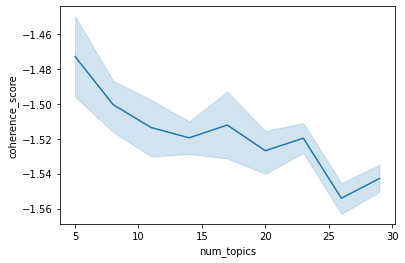

In [86]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [0]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    x= "num_topics"
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))